In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

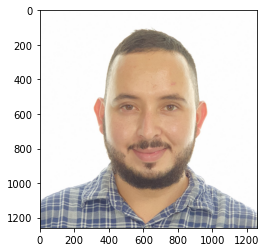

In [10]:
image = Image.open('./files/foto.jpg')
plt.imshow(image)

In [11]:
#Imagen de PIL con el modo LA
image_gr = image.convert('LA')
print(image_gr)

#Tome todos los datos de la banda 0
image_mat = np.array(list(image_gr.getdata(band=0)),float)
#Imagen de PIL tiene la info de los pixeles originales
print('Forma de matriz:\n',image_mat.shape,'\nForma de image_gr:\n',image_gr.size)

#Dandole nueva forma
image_mat.shape = (image_gr.size[0],image_gr.size[1])
print('Nueva forma de matriz:\n',image_mat.shape)

<PIL.Image.Image image mode=LA size=1260x1260 at 0x7FD3583917C0>
Forma de matriz:
 (1587600,) 
Forma de image_gr:
 (1260, 1260)
Nueva forma de matriz:
 (1260, 1260)


[[254. 254. 254. ... 254. 254. 254.]
 [254. 254. 254. ... 254. 254. 254.]
 [254. 254. 254. ... 255. 255. 254.]
 ...
 [113. 101.  94. ... 149. 157. 157.]
 [124. 114. 107. ... 150. 157. 155.]
 [145. 140. 136. ... 150. 155. 153.]] 
Valor maximo:
 255.0 
Valor minimo:
 49.0


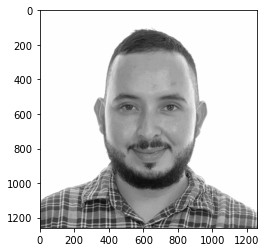

In [12]:
#Muestra imagen de la matriz en escala de grises
print(image_mat,'\nValor maximo:\n',np.max(image_mat),'\nValor minimo:\n',np.min(image_mat))
plt.imshow(image_mat,cmap='gray')
plt.show()

[[25.4 25.4 25.4 ... 25.4 25.4 25.4]
 [25.4 25.4 25.4 ... 25.4 25.4 25.4]
 [25.4 25.4 25.4 ... 25.5 25.5 25.4]
 ...
 [11.3 10.1  9.4 ... 14.9 15.7 15.7]
 [12.4 11.4 10.7 ... 15.  15.7 15.5]
 [14.5 14.  13.6 ... 15.  15.5 15.3]] 
Valor maximo:
 25.5 
Valor minimo:
 4.9


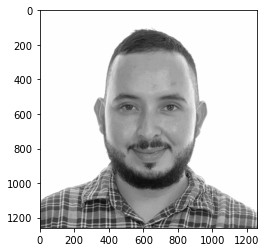

In [13]:
#Reduciendo los valores para ver que la relacion entre los valores, hace que se mantenga la imagen original, solo que lo interprete en la misma escala de grises
image_mat_reduced = image_mat / 10.0
print(image_mat_reduced,'\nValor maximo:\n',np.max(image_mat_reduced),'\nValor minimo:\n',np.min(image_mat_reduced))
plt.imshow(image_mat_reduced,cmap='gray')
plt.show()

In [14]:
U,D,V = np.linalg.svd(image_mat)
print('Original:\n',image_mat.shape,'\nU shape:\n',U.shape,'\nD shape:\n',D.shape,'\nV shape:\n',V.shape)

Original:
 (1260, 1260) 
U shape:
 (1260, 1260) 
D shape:
 (1260,) 
V shape:
 (1260, 1260)


shape U:
 (1260, 1) 
shape D diag:
 (1, 1) 
shape V:
 (1, 1260)

Valor maximo:
 294.741275323758 
Valor minimo:
 94.17539205646595


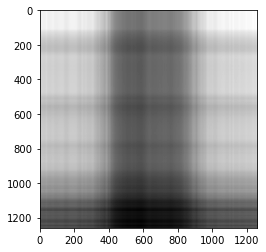

In [15]:
print('shape U:\n',np.matrix(U[:,:1]).shape,'\nshape D diag:\n',np.diag(D[:1]).shape,'\nshape V:\n',np.matrix(V[:1,:]).shape)
#Primera columna de U, primer valor de D diagonalizado, primera fila de V
image_recons = np.matrix(U[:,:1]) * np.diag(D[:1]) * np.matrix(V[:1,:])

print('\nValor maximo:\n',np.max(image_recons),'\nValor minimo:\n',np.min(image_recons))
plt.imshow(image_recons,cmap='gray')


Valor maximo:
 270.1387996727242 
Valor minimo:
 39.448617686897435


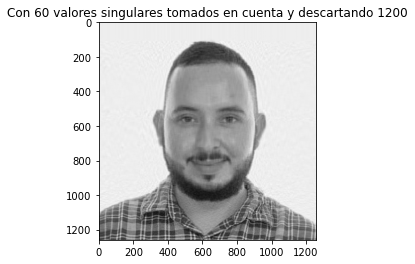

In [24]:
#Variando el numero de valores singulares a ser tomados en cuenta
num_valores_singulares = 60
image_recons = np.matrix(U[:,:num_valores_singulares]) * np.diag(D[:num_valores_singulares]) * np.matrix(V[:num_valores_singulares,:])

print('\nValor maximo:\n',np.max(image_recons),'\nValor minimo:\n',np.min(image_recons))
plt.imshow(image_recons,cmap='gray')
plt.title(f'Con {num_valores_singulares} valores singulares tomados en cuenta y descartando {image_gr.size[0]-num_valores_singulares}')
plt.show()